In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.columns = data.columns.str.lower()
data.dropna(subset= ['name'], inplace= True)

data_not_tbd = data.query('user_score != "tbd"')
data_not_tbd = data_not_tbd.dropna()
data_not_tbd['user_score'] = data_not_tbd['user_score'].astype('float64')
data_not_tbd_dict = data_not_tbd.groupby("rating")['user_score'].median().to_dict()


def tbd_filler(row):
    if row['user_score'] == "tbd" or np.isnan(float(row['user_score'])):
        return data_not_tbd_dict.get(row['rating'])
    return row['user_score']


data['user_score'] = data.apply(tbd_filler, axis=1)

data['user_score'] = data['user_score'].fillna('0')
data['user_score'] = data['user_score'].astype('float64')

Приведем столбцы к нижнему регистру.
Удалим две строки со значением nan в "name"

Для решения проблемы со значениями tbd в столбце с пользовательскими рейтингами создадим отдельный словарь, в котором ключи в из столбца с рейтингом("ratings") будут соотвествовать медианные значения числовых значений из столбца "user_score".
После с помощью функции сделаем замену пропущенных значений или значений "tbd" в столбце "user_score" на медианные.

In [4]:
display(data.head())
display(data['year_of_release'].describe())
year_dict = data.groupby("name")['year_of_release'].median().to_dict()
def year_func(row):
    if np.isnan(row['year_of_release']):
        return year_dict[row["name"]]
    return row['year_of_release']

data['year_of_release'] = data.apply(year_func, axis=1)

data.dropna(subset= ['year_of_release'], inplace= True)

data['year_of_release'] = np.floor(data['year_of_release']).astype('Int64')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN


count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

В графе с указанием даты релиза есть небольшое количество значений nan.
Попробуем частично решить проблему создав словарь в котором каждому ключу с указанием игры будет соответствовать медианный год выпуска. Делаемся это с расчетом на то, что каждая игра выходила примерно в одно и тоже время на всех платформах.

Далее через функцию подменяем nan`ы на медианые значения из словаря в основной таблице с данными.
То небольшое количество строк, где нам не удалось определить год мы удаляем.

От дробных значений в столбце year_of_release избавимся благодаря методу .floor, который округлит значения в меньшую сторону. После чего получившиеся значения переведем из дробного значения целочисленные.



In [5]:
def sales (row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] +row['other_sales']

data['sales'] = data.apply(sales, axis = 1)


Подсчитаем количество выпущенных игр по годам.

Для визуализации количества выпущенных по годам игр построим график.
На нем можно заметить постепенный рост количества выпущенных игр с пиком в 2008-2009.
После число выпускаемых игр нормализовалось и ежегодно стало выпускаться примерно равное количество.

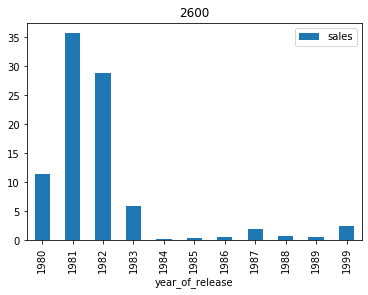

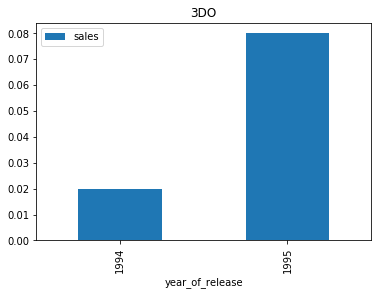

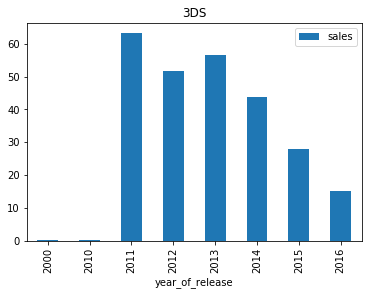

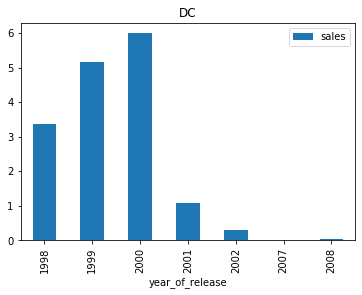

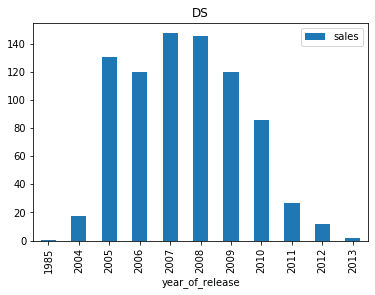

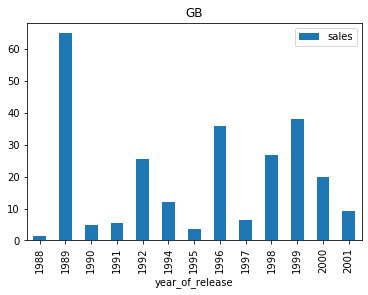

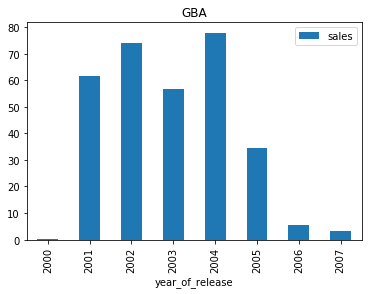

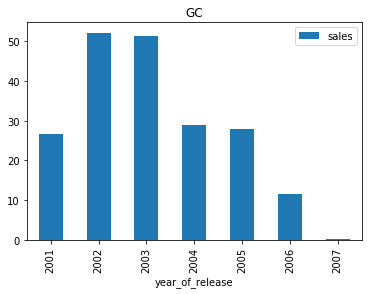

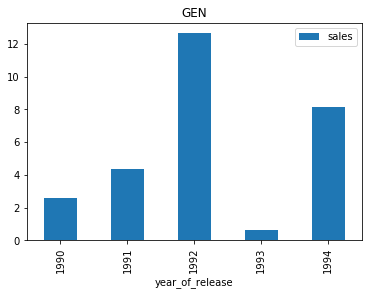

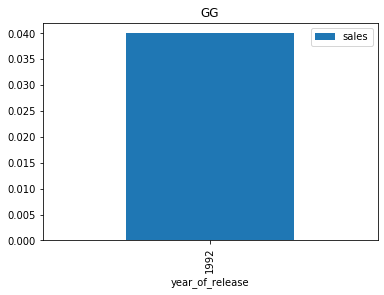

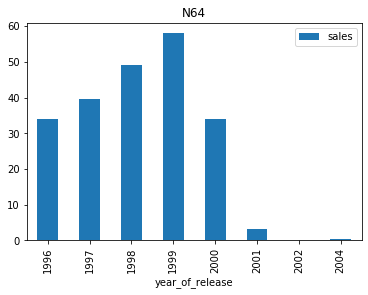

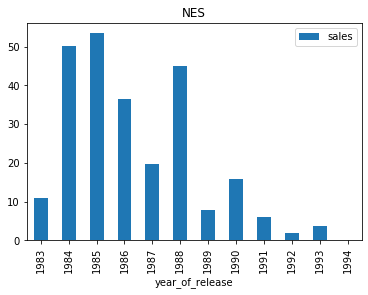

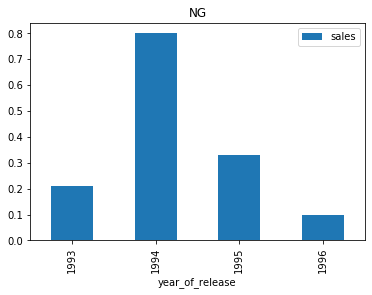

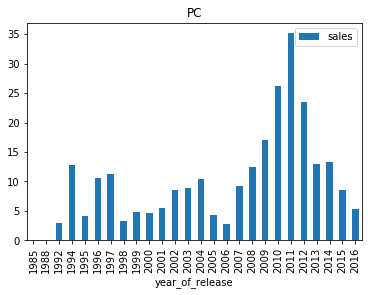

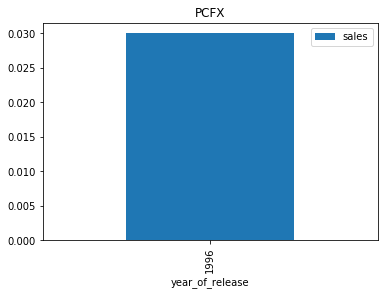

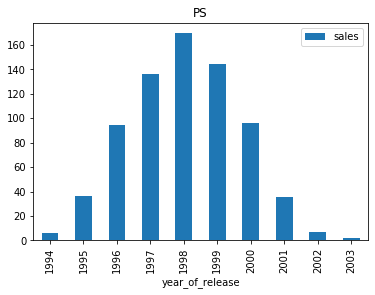

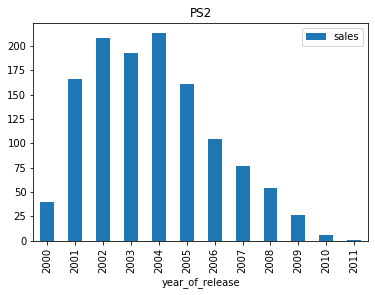

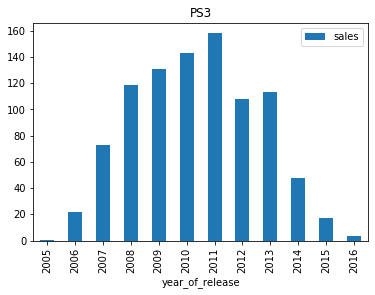

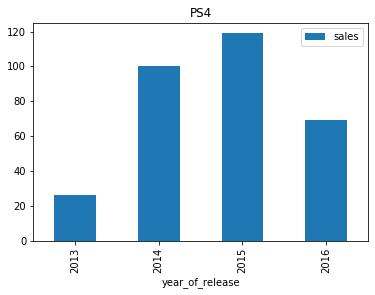

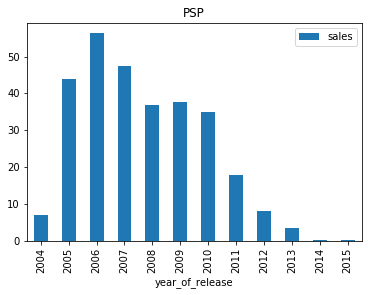

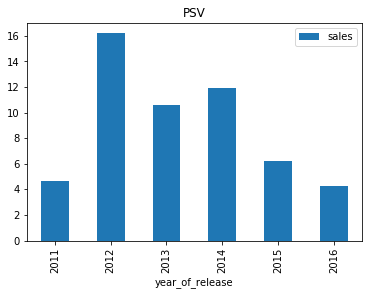

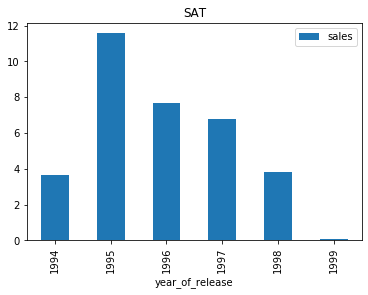

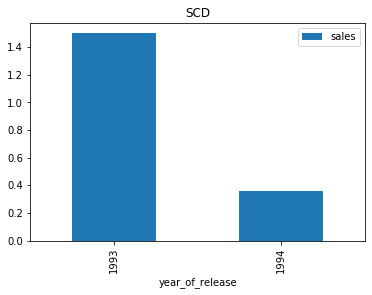

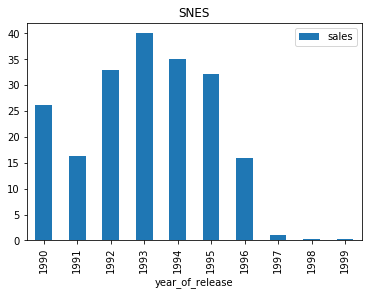

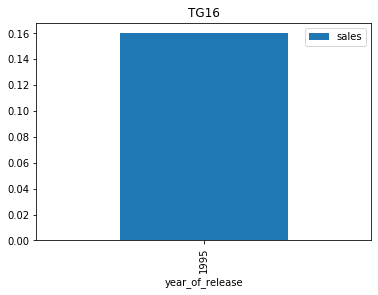

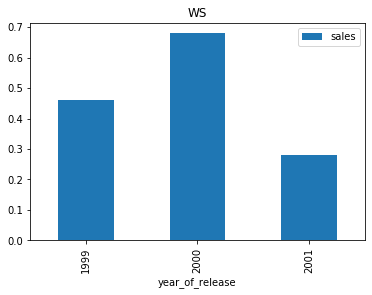

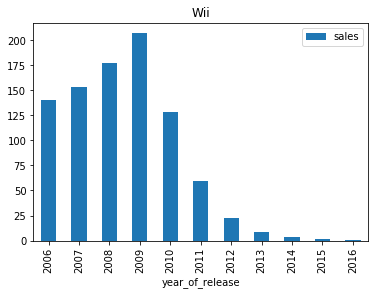

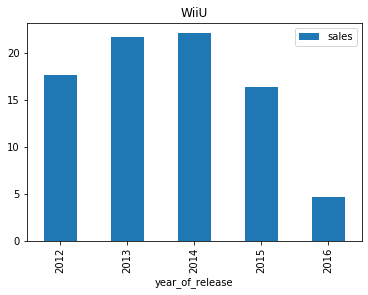

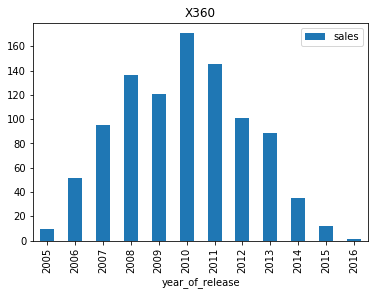

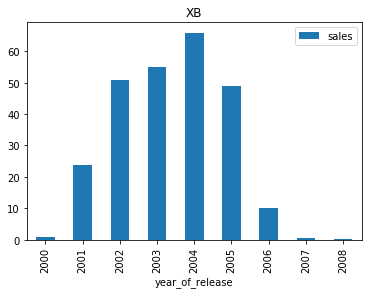

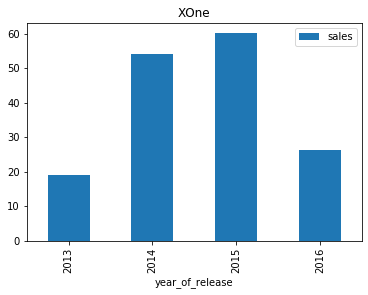

In [7]:
sales_per_year = data.pivot_table(index= ['platform', 'year_of_release'], values= ['sales'], aggfunc= 'sum').reset_index()

for name, group_sales_per_year in sales_per_year.groupby('platform'):
    group_sales_per_year.plot(y = 'sales', x = 'year_of_release', title = name, kind = 'bar')
    plt.show()

Построим сводную таблицу для определения продаж по платформам в разные года.

Напишем цикл, который будем строить отдельную гистаграмму для каждой платформы с графиком, который покажет как менялись продажи по годам.

"Жизненный цикл" большинства платформ находится примерно между 6-10 годами.
Есть и такие, для которых игры выпускали всего пару лет.

In [8]:
display(sales_per_year.groupby('platform')['sales'].sum().sort_values(ascending= False).head(10))


platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
Name: sales, dtype: float64

Выведем топ-10 платформы с самым высоким показателем продаж за все свое время существования

In [9]:
relevant_data = data.query('year_of_release > 2012')

Мною было принято выбрать актуальный период с 2012 года т.к. основная задача построить прогноз именно на 2017, а не на долгосрочную перспективу.
Данные за 2016 год не полные по условию и опираться только на него не стоит. Поэтому берем 2015 и закладываем минимальные сроки жизнедеятельности платформ.
Таким образом я планирую получить прогноз в краткосрочной перспективе.

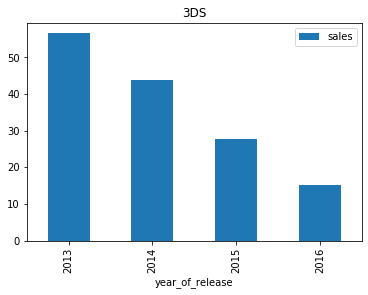

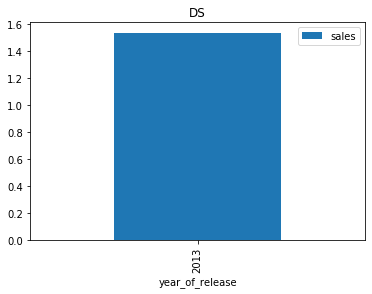

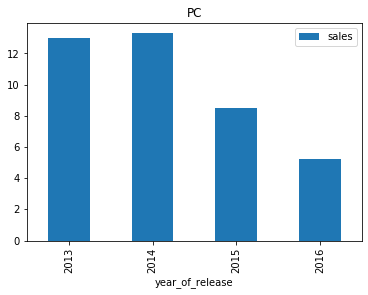

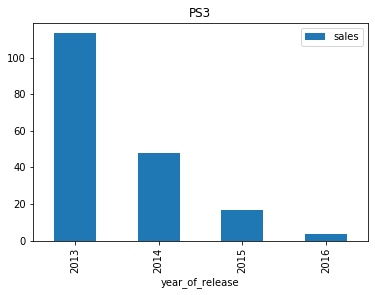

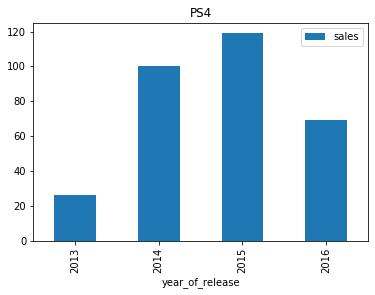

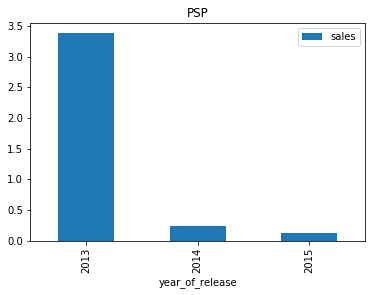

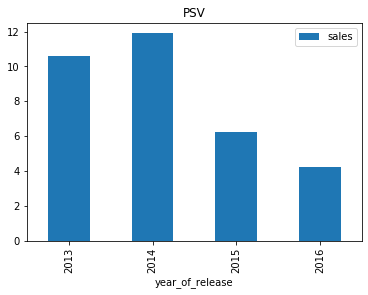

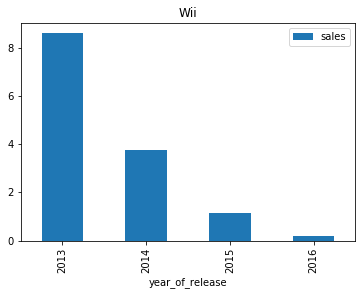

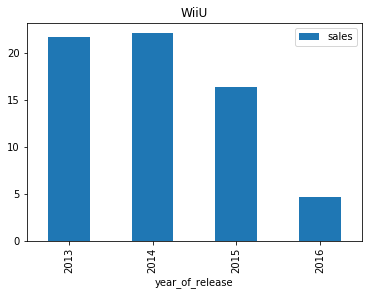

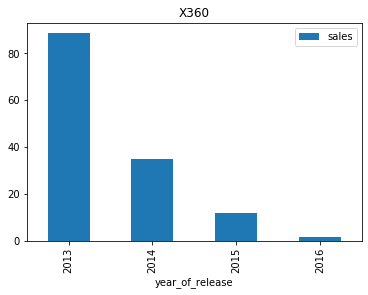

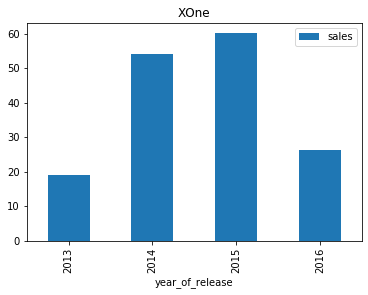

In [10]:
sales_per_year_since_2012 = relevant_data.pivot_table(index= ['platform', 'year_of_release'], values= ['sales'], aggfunc= 'sum').reset_index()

for name, group_sales_per_year_since_2012 in sales_per_year_since_2012.groupby('platform'):
    group_sales_per_year_since_2012.plot(y = 'sales', x = 'year_of_release', title = name, kind = 'bar')
    plt.show()

Я по умолчанию учитываю, что данные за 2016 год не полные и в полной мере не могу на них ориентироваться.
Если выбирать топ-3 потенциально прибыльные платформы, то я бы сделал ставку на WiiU (не самая хорошая динамика, но велика вероятность, что разработчики не обделят вниманием эту платформу. Можно было выбрать PC, однако, продажи с их продаж ниже не смотря на более положительную динамику),  PS4(взрывная динамика и высокие суммарные продажи - хороший выбор. Даже в случае выхода ps5 можно не сильно опасаться, т.к. продажи у более ранней ps3 также на неплохом уровне), XOne (примерно равен ps4 по динамике, но уступает по  суммарным продажам).

Падают по продажам x360, Wii, PS3(у всех трех прекрасно прослеживается низходящий тренд).

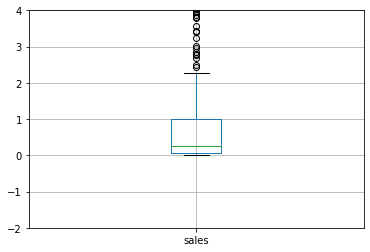

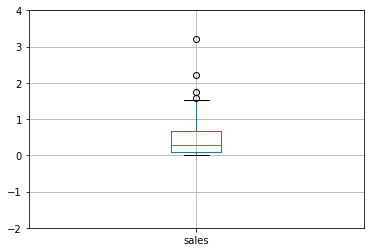

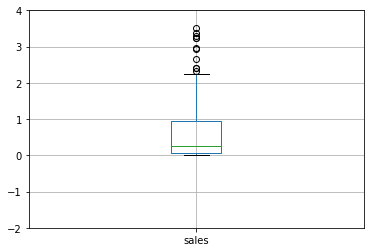

In [11]:
top_platforms = relevant_data.query('platform == "WiiU" or platform == "PS4" or platform == "XOne"')                              

top_platforms = top_platforms.query('user_score != 0')

games_sales = top_platforms.groupby(['platform', 'name']).agg({'sales': 'sum'})

for platform, games_sales_group in games_sales.groupby('platform'):
     games_sales_group.boxplot(column= 'sales')
     plt.ylim(-2, 4)
     plt.show()

Судя по графикам с распределением разница в продажах у PS4 и XOne практически не прослеживается. У WiiU этот показатель несколько ниже.

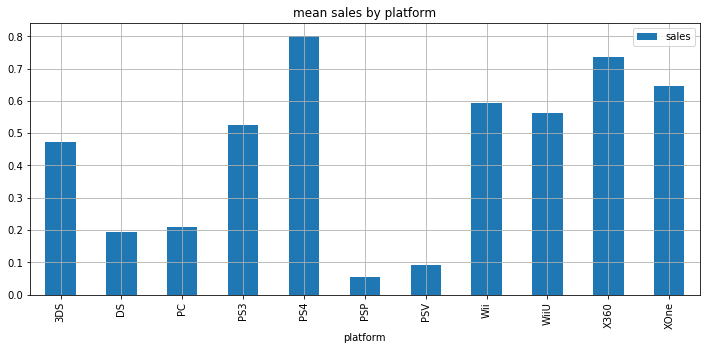

In [12]:
mean_sales = relevant_data.pivot_table(index = 'platform', values = 'sales').reset_index()
mean_sales.plot(x = 'platform', y = 'sales', title = 'mean sales by platform', kind = 'bar', grid = True, figsize = (12, 5))
plt.show()

Построим график для того чтобы показать разницу в средних продажах по платформам.
Показания по средним схожи с данными полученными нами ранее.
Высокие средние показатели по платформам, на которые я предлагал ориентироваться в 2017 четко прослеживаются.
Выбивается высокий показатель по средним продажам на платформе X360, но это во многом из-за показателей за 2013 год. После продажи по данной платформе уже были гораздо ниже.

### Обновленные данные.
Немного поменял тип диаграммы для того чтобы поместились подписи всех платформ.

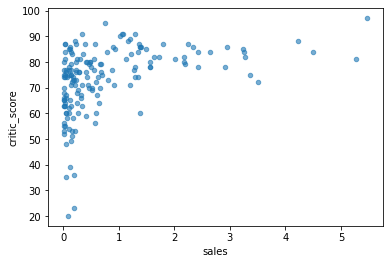

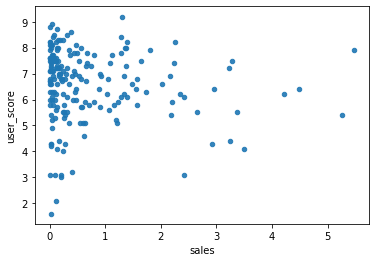

Корреляция между отзывами критиков и продажами на платформе Xone равна: 0.41
Корреляция между отзывами пользователей и продажами на платформе Xone равна: -0.09


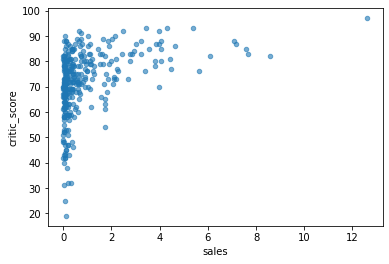

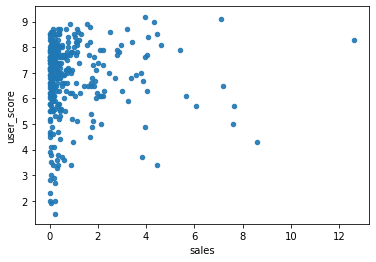

Корреляция между отзывами критиков и продажами на других платформах равна: 0.40
Корреляция между отзывами пользователей и продажами на других платформах равна: 0.03


In [13]:
top_platforms.query('platform == "XOne"').plot(x = 'sales', y = 'critic_score', kind = 'scatter', alpha = 0.6)
top_platforms.query('platform == "XOne"').plot(x = 'sales', y = 'user_score', kind = 'scatter', alpha = 0.9)
plt.show()

print('Корреляция между отзывами критиков и продажами на платформе Xone равна: {:.2f}'.format(top_platforms.query('platform == "XOne"')['critic_score'].corr(top_platforms.query('platform == "XOne"')['sales'])))
print('Корреляция между отзывами пользователей и продажами на платформе Xone равна: {:.2f}'.format(top_platforms.query('platform == "XOne"')['user_score'].corr(top_platforms.query('platform == "XOne"')['sales'])))

top_platforms.query('platform != "XOne"').plot(x = 'sales', y = 'critic_score', kind = 'scatter', alpha = 0.6)
top_platforms.query('platform != "XOne"').plot(x = 'sales', y = 'user_score', kind = 'scatter', alpha = 0.9)

plt.show()

print('Корреляция между отзывами критиков и продажами на других платформах равна: {:.2f}'.format(top_platforms.query('platform != "XOne"')['critic_score'].corr(top_platforms.query('platform != "XOne"')['sales'])))
print('Корреляция между отзывами пользователей и продажами на других платформах равна: {:.2f}'.format(top_platforms.query('platform != "XOne"')['user_score'].corr(top_platforms.query('platform != "XOne"')['sales'])))


Построим диаграмму рассеивания на примере платформы XOne чтобы визуально оценить зависимость продаж от отзывов критиков.
Также посчитам корреляцию между этими показателями в рамках платформы.

Судя по плотности пересечений на диаграмме можно сделать вывод, что с увеличением рейтинга продажи в большинстве случаев не сильно увеличиваются, однако, не редки случаи когда с увеличением рейтинга растут и продажи(особенно это хорошо заметно после показателя рейтинга 60+).
Корреляция также показывает достаточно высокий показатель зависимости в 0.41

### Обновленные данные.
Добавил диаграмму рассеивания для платформы Xone для оценки зависимости продаж от оценок пользователей.
В целом показатели по продажам не сильно меняются с увеличением оценок пользователей, близкая к нулевому значению корреляция это доказывает.

После того как мы построили аналогичные диаграммы для оценки зависимостей продаж от оценки критиков и пользователей, можно сделать вывод, что общая тенденция по зависимостям не сильно отличается от данных полученных отдельно по платформе Xone. 
Таким образом на продажи по всем платформам большее воздействие оказывают именно оценки критиков.

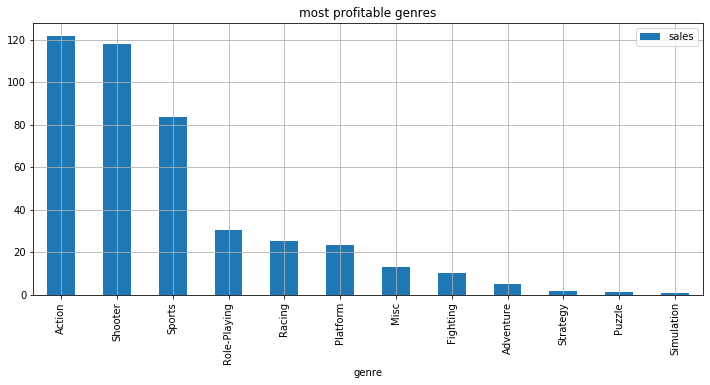

In [14]:
top_genres = top_platforms.pivot_table(index= 'genre', values= 'sales', aggfunc= 'sum').sort_values('sales', ascending= False).reset_index()

top_genres.plot(x = 'genre', y = 'sales', title = 'most profitable genres', kind = 'bar', grid = True, figsize = (12, 5))
plt.show()


Топ-3 самых прибыльных жанра это Shooter, Action и Sports. При этом первые два лидируют со значительным отрывом от всех остальных жанров.
Самым низким по продажам жанром оказался Puzzle.

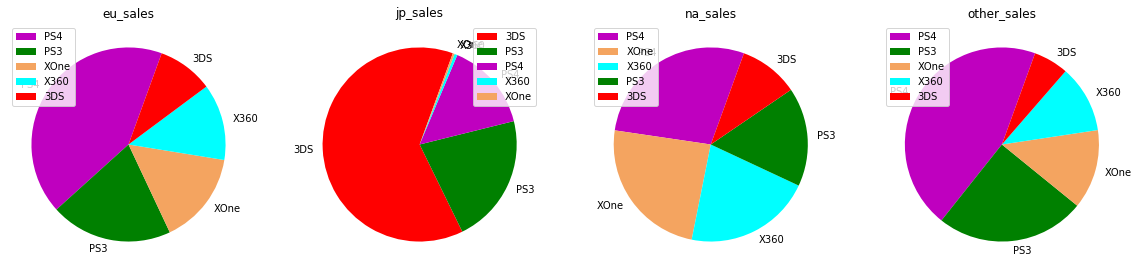

In [15]:
top_5_platforms = relevant_data.pivot_table(index = 'platform', values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales'], aggfunc= 'sum').reset_index()
top_5_platforms = top_5_platforms.sort_values('sales', ascending= False)[:5]

dict_colors = {'PS3': 'g', 'PS4': 'm',
               'XOne': 'sandybrown', 'X360': 'aqua', '3DS': 'r'}

region_sales = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']

plt.figure(figsize=(20, 6))
for i, region in enumerate(region_sales):
    plt.subplot(1, 4, i + 1)
    sales_by_region = top_5_platforms.pivot_table(
        index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head(5)
    colors = [dict_colors[key] for key in sales_by_region.index]
    plt.pie(sales_by_region.values.flatten(), startangle=70, labels=sales_by_region.index, colors=colors)
    plt.title(region)
    plt.legend()
plt.show()

Я выявил топ-5 самых популярных платформ ориентируясь на суммарные продажи по всем трем регионам.
Создадим словарь, где каждой платформе будет соответствовать свой цвет на будущих круговых диаграммах.
Далее с помощью цикла построим для каждого в отдельности региона кольцевую диаграмму доли в которой будут пропорциональны обьемам продаж по данному региону.

PS4 занимает лидирующие позиции 2 из 3 регионов(+ первое место в других регионах).
3DS захватила большую часть Японского рынка скорее всего из-за того, что многие местные производители игр локализовывали их только для этой платформы.

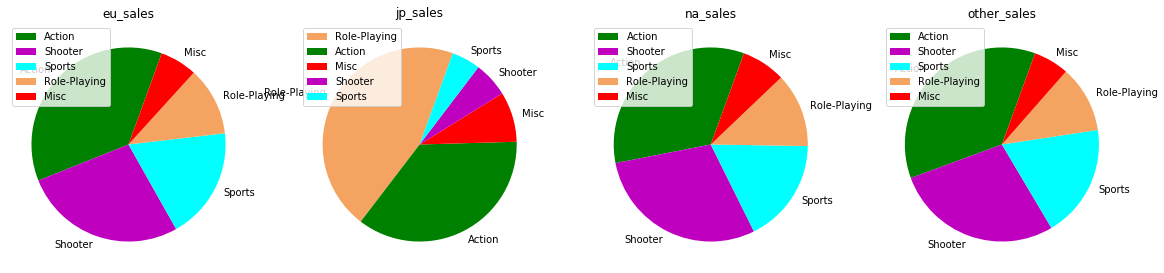

In [16]:
top_5_genres = relevant_data.pivot_table(index = 'genre', values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales'], aggfunc= 'sum').reset_index()
top_5_genres = top_5_genres.sort_values('sales', ascending= False).head(5)

dict_colors_for_genres = {'Action': 'g', 'Shooter': 'm',
               'Role-Playing': 'sandybrown', 'Sports': 'aqua', 'Misc': 'r'}


plt.figure(figsize=(20, 6))
for i, genre in enumerate(region_sales):
    plt.subplot(1, 4, i + 1)
    sales_by_genres = top_5_genres.pivot_table(
        index='genre', values= genre, aggfunc='sum').sort_values(by= genre, ascending=False).head(5)
    colors = [dict_colors_for_genres[key] for key in sales_by_genres.index]
    plt.pie(sales_by_genres.values.flatten(), startangle=70, labels=sales_by_genres.index, colors=colors)
    plt.title(genre)
    plt.legend()
plt.show()


Построим кольцевые диаграммы ориентируясь на суммарные продажи по жанрам.

Общая картина с распределением по жанрам чем то похожа с распределением по платформам.
Снова в 2 из 3 случаем лидирует один жанр жанр(action) и в целом по миру распределение долей по жанрам в общих чертах схожее, а в Японском регионе по другому- лидирует альтернативный жанр(role-playing).
Жанр action в Японском регионе занимает второе место, а достаточно популярный в остальном мире sports- на последнем месте.

In [17]:
display(relevant_data.groupby('rating').agg({'na_sales': 'sum','eu_sales': 'sum' ,'jp_sales': 'sum', 'other_sales': 'sum'}))


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,79.05,83.36,15.14,22.61
E10+,54.24,42.69,5.89,12.57
M,165.29,145.80,14.11,47.11
T,49.79,41.95,20.59,14.29


Рейтинг esrb имеет общие лидирующие позиции по значению "М" во всех регионах кроме японского, где превалирует рейтинг "Т",на который приходятся самые малые сборы в европейском и северо-американском регионах.

### Обновленные данные.
Общие портреты пользователей по регионам:
1.Северо-Американский регион- игроки предпочитающие активные игры, которые занимают практически 4/5 рынка.
Из приставок предпочтение отдают популярным и актуальным платформам x360, Xone, ps4.
2.Европейский регион- выбор игроков данного региона касательно игр практически идентичен выбору геймеров из северо-американского региона. Расходятся предпочтения игроков только в выборе платформ. В данном регионе лидирует продукция компании Sony. Для увеличения продаж можно уверенно делать упор именно на платформы ps4 и ps3. 
3.Японский регион- специфика вкуса игроков в данном регионе состоит в том, что в своем большинстве люди предпочитают игры жанка role-playing. Почти 50% продаж приходится именно на этот жанр. За ним уже следует action. К остальным жанрам у игроков данного региона куда меньший интерес. Три из пяти игроков выбирает приставку 3DS, которая является самой популярной в регионе. При планировании продаж следует учитывать, что если игра не выходила на одной из трех платформ 3DS,ps3,ps4, то скорее всего она будет пользоваться крайне низким спросом.
4.Другие страны- игроки из других стран при выборе игр и платформ ориентируются на европейский и северо-американский регион. Таким образом можно прогнозировать продажи просто анализируя данные с европейского региона.

In [18]:
first_platform = relevant_data.query('platform == "XOne"')
second_platform = relevant_data.query('platform == "PC"')

first_platform.dropna(subset= ['user_score'], inplace= True)
second_platform.dropna(subset= ['user_score'], inplace= True)

first_platform['user_score'] = first_platform['user_score'].astype('Float64')
second_platform['user_score'] = second_platform['user_score'].astype('Float64')

alpha = 0.05

results_g_1 = st.ttest_ind(
    first_platform['user_score'],
    second_platform['user_score'])

print('p-значение:', results_g_1.pvalue)

if (results_g_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.7337110258356657
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/o

Нулевая гипотеза состоит в том, что средние пользовательские рейтинги двух платформ равны. 
Альтернативная гипотеза состоит в том, что средние рейтинги будут отличаться. 
По результатам можно видеть, что разница между средними величинами совсем не велика и отличается незначительно. 

In [19]:
action_genre = relevant_data.query('genre == "Action"')
sports_genre = relevant_data.query('genre == "Sports"')

action_genre.dropna(subset= ['user_score'], inplace= True)
sports_genre.dropna(subset= ['user_score'], inplace= True)

action_genre['user_score'] = action_genre['user_score'].astype('Float64')
sports_genre['user_score'] = sports_genre['user_score'].astype('Float64')

alpha = 0.05

results_g_1 = st.ttest_ind(
    action_genre['user_score'],
    sports_genre['user_score'])

print('p-значение:', results_g_1.pvalue)

if (results_g_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.08950095915637471
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/o

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Нулевая гипотеза состоит в том, что средние рейтинги жанров Action и Sports по тарифам одинаковы.
За альтернативную гипотезу примем вариант, что пользовательские рейтинги по этим двум жанрам разные.

По результатам можно видеть, что разница между средними величинами статистически значима. Если судить по p-значение, то разница между средними выручками по тарифам сильно отличается.

### Общий вывод.
Ориентируясь на данные предыдущих периодов мы составили топ-5 платформ, продажи по которым ожидаемо будут расти в 2017 году. 
Также можно сделать ставку на наиболее популярные жанры и таким образом увеличить продажи.
Безпроигрышный вариант делать упор на продукцию на стыках популярных платформ и жанров (как например приставка PS4 и жанр action).
Вместе с этим стоит особо выделить японский регион, который хоть и подвержен общим тенденциям, но всеже имеет свою специфику.
